<a href="https://colab.research.google.com/github/rdkuang/CIV1498/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Load

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Import Bike + Weather Data
bike_weather = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data3/period_bike_and_weather_new_header.csv')
bike_weather

Unnamed: 0        Time  Year  Month  Day  Period  Weekday  is_holiday  \
0              0  2017-01-01  2017      1    1       1        6        True   
1              1  2017-01-01  2017      1    1       2        6        True   
2              2  2017-01-01  2017      1    1       3        6        True   
3              3  2017-01-01  2017      1    1       4        6        True   
4              4  2017-01-01  2017      1    1       5        6        True   
...          ...         ...   ...    ...  ...     ...      ...         ...   
8970        8970  2021-11-30  2021     11   30       1        1       False   
8971        8971  2021-11-30  2021     11   30       2        1       False   
8972        8972  2021-11-30  2021     11   30       3        1       False   
8973        8973  2021-11-30  2021     11   30       4        1       False   
8974        8974  2021-11-30  2021     11   30       5        1       False   

      is_weekend  Mean Temp (°C)  ...  Rel Hum (%)  Wind Dir (10s deg)  \
0           True        1.250000  ...    67.666667           25.666667   
1           True        0.075000  ...    68.750000           25.000000   
2           True        2.220000  ...    57.200000           23.800000   
3           True        2.425000  ...    58.250000           22.750000   
4           True        1.000000  ...    74.600000           23.800000   
...          ...             ...  ...          ...                 ...   
8970       False       -0.533333  ...    74.500000           28.333333   
8971       False       -0.050000  ...    84.750000           20.333333   
8972       False        1.480000  ...    89.600000           18.666667   
8973       False        2.650000  ...    84.750000           23.750000   
8974       False        3.100000  ...    83.400000           25.400000   

      Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)        Weather  \
0           33.500000            16.10       100.218333          Clear   
1           28.750000            16.10       100.857500          Clear   
2           20.200000            16.10       101.222000          Clear   
3           17.250000            16.10       101.427500          Clear   
4           12.600000            16.10       101.704000          Clear   
...               ...              ...              ...            ...   
8970         9.166667            16.10       100.428333          Clear   
8971         9.750000             9.35       100.287500  Precipitation   
8972         6.000000            13.68       100.130000          Clear   
8973        16.750000            16.10       100.032500          Clear   
8974        26.000000            16.10       100.186000          Clear   

     Total Trips  Member Trips  Casual Trips  Mean Trip Duration (sec)  
0             69            65             4                593.086957  
1             18            18             0                491.555556  
2            116            96            20                784.103448  
3            171           141            30                697.105263  
4            108            92            16                691.777778  
...          ...           ...           ...                       ...  
8970         135            42            93                612.377778  
8971         821           318           503                687.566382  
8972        1085           411           674                626.935484  
8973        1788           630          1158                695.394295  
8974        1085           357           728                641.938249  

[8975 rows x 21 columns]

In [8]:
bike_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8975 non-null   int64  
 1   Time                      8975 non-null   object 
 2   Year                      8975 non-null   int64  
 3   Month                     8975 non-null   int64  
 4   Day                       8975 non-null   int64  
 5   Period                    8975 non-null   int64  
 6   Weekday                   8975 non-null   int64  
 7   is_holiday                8975 non-null   bool   
 8   is_weekend                8975 non-null   bool   
 9   Mean Temp (°C)            8975 non-null   float64
 10  Dew Point Temp (°C)       8975 non-null   float64
 11  Rel Hum (%)               8975 non-null   float64
 12  Wind Dir (10s deg)        8975 non-null   float64
 13  Wind Spd (km/h)           8975 non-null   float64
 14  Visibili

In [7]:
bike_weather.describe()

Unnamed: 0         Year        Month          Day       Period  \
count  8975.000000  8975.000000  8975.000000  8975.000000  8975.000000   
mean   4487.000000  2018.966017     6.428969    15.723120     3.000000   
std    2591.003667     1.401416     3.401786     8.797216     1.414292   
min       0.000000  2017.000000     1.000000     1.000000     1.000000   
25%    2243.500000  2018.000000     3.000000     8.000000     2.000000   
50%    4487.000000  2019.000000     6.000000    16.000000     3.000000   
75%    6730.500000  2020.000000     9.000000    23.000000     4.000000   
max    8974.000000  2021.000000    12.000000    31.000000     5.000000   

           Weekday  Mean Temp (°C)  Dew Point Temp (°C)  Rel Hum (%)  \
count  8975.000000     8975.000000          8975.000000  8975.000000   
mean      2.998886        9.566997             4.688795    72.978173   
std       2.001503        9.799958            10.182923    14.330287   
min       0.000000      -21.675000           -27.950000    18.500000   
25%       1.000000        1.980000            -2.650000    63.500000   
50%       3.000000        8.900000             4.383333    73.500000   
75%       5.000000       18.400000            13.336667    84.166667   
max       6.000000       33.500000            24.550000   100.000000   

       Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
count         8975.000000      8975.000000      8975.000000      8975.000000   
mean            19.784179        16.946995        15.089283       100.709050   
std              9.041374         9.260612         2.650935         0.778644   
min              1.250000         0.000000         0.350000        97.868000   
25%              9.750000        10.166667        16.100000       100.213250   
50%             22.000000        15.200000        16.100000       100.692000   
75%             27.200000        22.200000        16.100000       101.210000   
max             36.000000        69.750000        16.100000       103.615000   

       Total Trips  Member Trips  Casual Trips  Mean Trip Duration (sec)  
count  8975.000000   8975.000000   8975.000000               8975.000000  
mean   1295.614485    935.351198    360.263287                724.653647  
std    1355.607216    861.485861    624.806520                115.115991  
min       5.000000      5.000000      0.000000                389.500000  
25%     298.000000    239.000000     20.000000                641.944024  
50%     825.000000    675.000000     98.000000                707.785276  
75%    1837.000000   1403.000000    390.500000                793.469252  
max    9764.000000   4306.000000   5763.000000               1153.911403

# Temporal Relationship

In [9]:
# Convert to Datatime format for further processing
bike_weather['Time'] = pd.to_datetime(bike_weather['Time'])
bike_weather = bike_weather.set_index(bike_weather['Time'])
bike_weather.drop(columns=['Unnamed: 0'], inplace = True)
bike_weather.columns

Index(['Time', 'Year', 'Month', 'Day', 'Period', 'Weekday', 'is_holiday',
       'is_weekend', 'Mean Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Visibility (km)',
       'Stn Press (kPa)', 'Weather', 'Total Trips', 'Member Trips',
       'Casual Trips', 'Mean Trip Duration (sec)'],
      dtype='object')

In [10]:
# Resample into one day interval
bike_weather_day = (bike_weather.resample('1D')
                    .agg({'Weekday': 'min', 'is_holiday': 'min', 'is_weekend': 'min',
                          'Mean Temp (°C)': 'mean',
                          'Total Trips': 'sum',
                          'Member Trips': 'sum',
                          'Casual Trips': 'sum',
                          'Mean Trip Duration (sec)': 'mean'
                          }))
bike_weather_day

Weekday  is_holiday  is_weekend  Mean Temp (°C)  Total Trips  \
Time                                                                       
2017-01-01        6        True        True        1.394000          482   
2017-01-02        0        True       False        2.972000          826   
2017-01-03        1       False       False        4.285667          871   
2017-01-04        2       False       False       -1.117667         1395   
2017-01-05        3       False       False       -6.825000         1210   
...             ...         ...         ...             ...          ...   
2021-11-26        4       False       False        0.631000         6865   
2021-11-27        5       False        True       -0.189667         6195   
2021-11-28        6       False        True       -0.421333         1738   
2021-11-29        0       False       False       -0.983000         4100   
2021-11-30        1       False       False        1.329333         4914   

            Member Trips  Casual Trips  Mean Trip Duration (sec)  
Time                                                              
2017-01-01           412            70                651.525800  
2017-01-02           756            70                623.044149  
2017-01-03           853            18                672.256168  
2017-01-04          1361            34                611.221527  
2017-01-05          1191            19                614.611909  
...                  ...           ...                       ...  
2021-11-26          2491          4374                643.014368  
2021-11-27          2263          3932                665.702049  
2021-11-28           613          1125                706.586484  
2021-11-29          1407          2693                674.172191  
2021-11-30          1758          3156                652.842438  

[1795 rows x 8 columns]

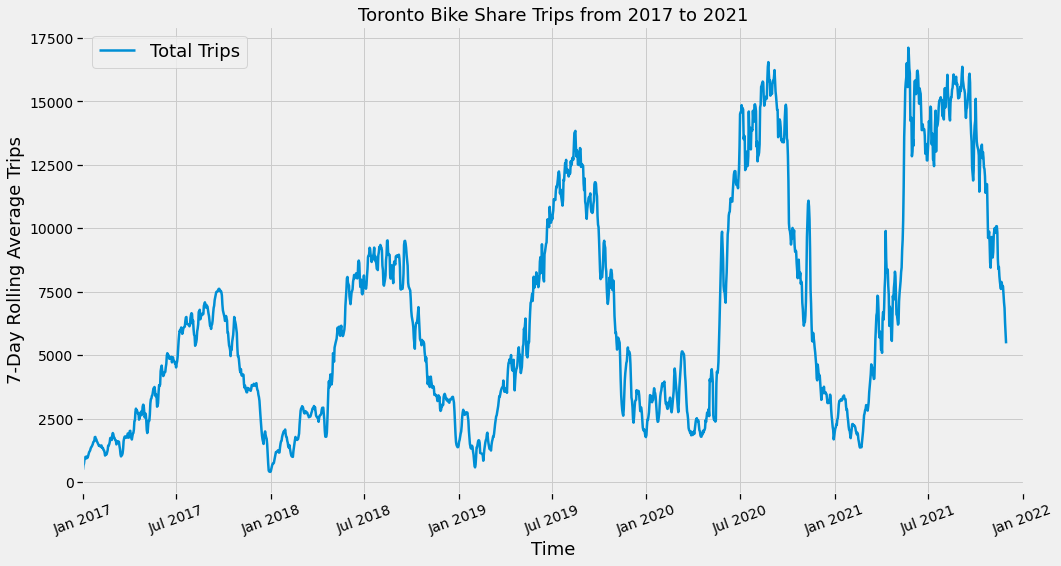

In [19]:
# Calculate Rolling 7-day average for better visualization
bike_rolling_day = bike_weather_day.rolling('7D').mean().reset_index()

# Set figure size and define plot
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Total Trips', linewidth=2.5, label = 'Total Trips' )

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.tick_params(axis='x', rotation = 20, labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

ax.set_xlim([datetime.date(2017,1,1), datetime.date(2022,1,1)])

ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('7-Day Rolling Average Trips', fontsize = 18)
ax.legend(fontsize = 18)
ax.set_title('Toronto Bike Share Trips from 2017 to 2021', fontsize=18)
plt.show()

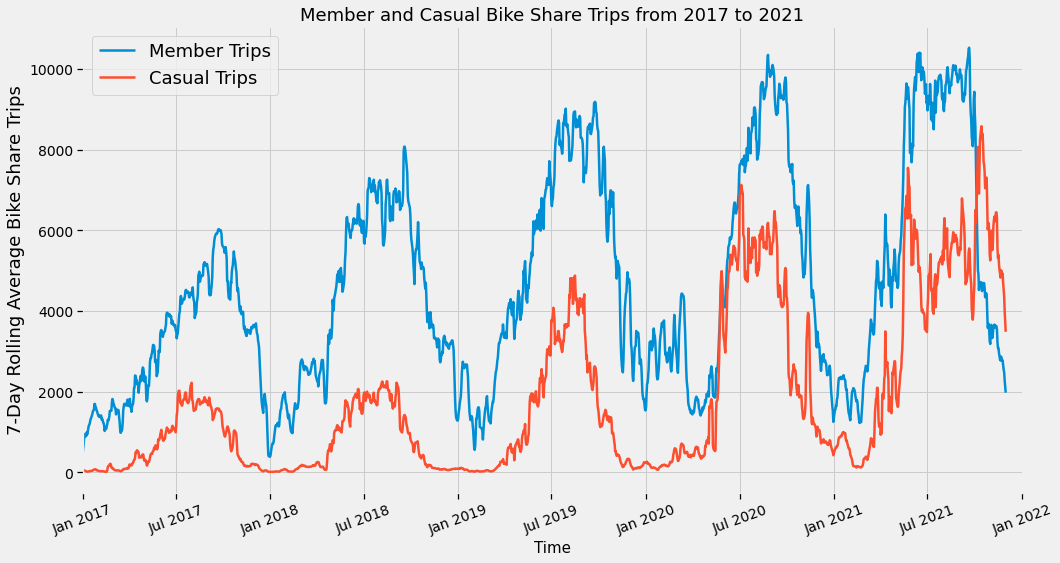

In [22]:
bike_rolling_day = bike_weather_day.rolling('7D').mean().reset_index()

plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Member Trips', linewidth=2.5, label = 'Member Trips' )
ax = sns.lineplot(data=bike_rolling_day, x='Time', y='Casual Trips', linewidth=2.5, label = 'Casual Trips')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.tick_params(axis='x', rotation = 20, labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
ax.set_xlim([datetime.date(2017,1,1), datetime.date(2022,1,1)])

ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('7-Day Rolling Average Bike Share Trips', fontsize = 18)
ax.legend(fontsize = 18)
ax.set_title('Member and Casual Bike Share Trips from 2017 to 2021', fontsize=18)
plt.show()

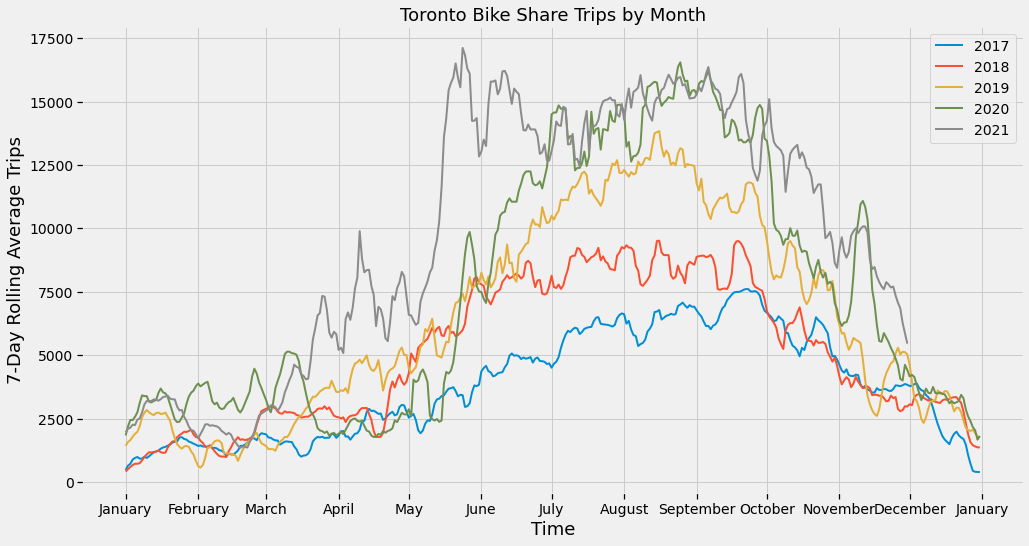

In [20]:
plt.figure(figsize=(15, 8))

for i in range(2017, 2022, 1):
    monthly = bike_rolling_day[bike_rolling_day['Time'].dt.year == i]
    monthly_new = monthly.copy(deep=True)
    monthly_new['Time'] = monthly['Time'].apply(lambda x: x.replace(year = 2000)) # Create dummy year
    ax = sns.lineplot(data=monthly_new,x='Time', y='Total Trips', linewidth=2, label = i)
    
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('7-Day Rolling Average Trips', fontsize = 18)
ax.legend(fontsize = 14)
ax.set_title('Toronto Bike Share Trips by Month', fontsize=18)
plt.show()

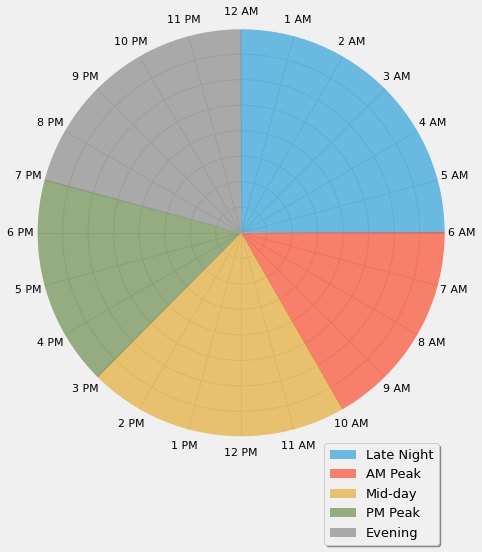

In [ ]:
# Credit to https://stackoverflow.com/questions/56418087/how-to-plot-time-stamps-hhmm-on-python-matplotlib-clock-polar-plot

df = pd.DataFrame({'Time': {0: '03:00', 1: '08:00', 2: '12:30', 3: '17:00', 4: '21:30'}})

# Convert hour to angular unit
xs = pd.to_datetime(df['Time'],format= '%H:%M' )
xs = xs - datetime.datetime.strptime('00:00:00', '%H:%M:%S')
xs = xs.dt.seconds / (24 * 3600)
xs = xs * 2 * np.pi

# Plot timing
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection = 'polar')
ax.bar(xs[0], 2, width = 1.578, alpha=0.7, color='#30a2da', label='Late Night')
ax.bar(xs[1], 2, width = 1.055, alpha=0.7, color='#fc4f30', label='AM Peak')
ax.bar(xs[2], 2, width = 1.31, alpha=0.7, color='#e5ae38', label='Mid-day')
ax.bar(xs[3], 2, width = 1.055, alpha=0.7, color='#6d904f', label='PM Peak')
ax.bar(xs[4], 2, width = 1.31, alpha=0.7, color='#8b8b8b', label='Evening')

# Make the labels go clockwise
ax.set_theta_direction(-1)

#Place Zero at Top
ax.set_theta_offset(np.pi/2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))

# set the label names
ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
ax.set_xticklabels(ticks)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

#Plot to the clockface limit
plt.ylim(0,2)

plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True, fontsize = 13)
plt.show()

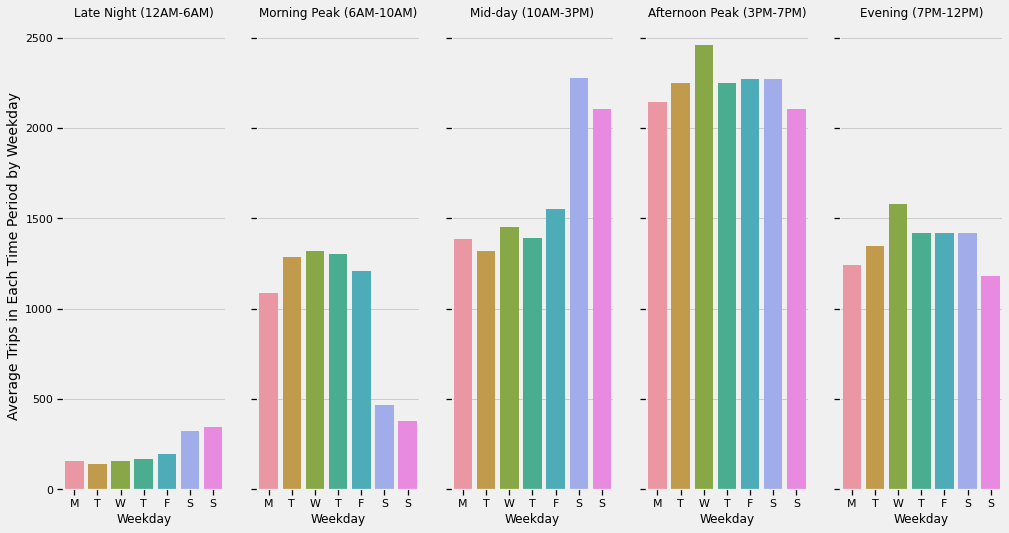

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True, sharey=True)


period_names = ['Late Night (12AM-6AM)', 'Morning Peak (6AM-10AM)', 'Mid-day (10AM-3PM)', 'Afternoon Peak (3PM-7PM)', 'Evening (7PM-12PM)']

for p, ax in zip(sorted(bike_weather['Period'].unique()), axes):
    ax.set_title(period_names[(p-1)])

    ride_by_weekday_in_period = (bike_weather[bike_weather['Period'] == p]
                             .groupby(['Weekday'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Weekday', 
        y='Total Trips', 
        data=ride_by_weekday_in_period,
        ax=ax
    )
    ax.set_xticklabels(['M','T','W','T','F','S','S'])
    ax.set_ylabel('')  

axes[0].set_ylabel('Average Trips in Each Time Period by Weekday', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


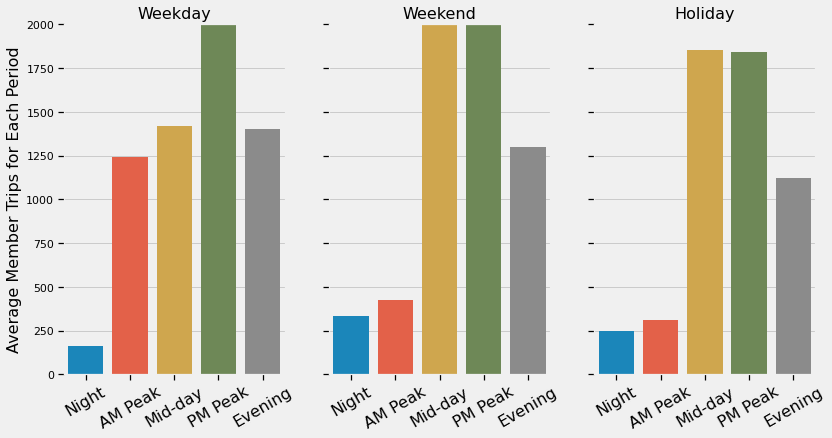

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

day_names = ['Weekday', 'Weekend']

for w, ax in zip(sorted(bike_weather['is_weekend'].unique()), axes):

    ride_by_weekday_in_period = (bike_weather[bike_weather['is_weekend'] == w]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Period', 
        y='Total Trips', 
        data=ride_by_weekday_in_period,
        ax=ax,
    )
    ax.set_title(day_names[(w)], fontsize = 16)
    ax.set_xlabel('') 
    ax.set_ylabel('')  
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'], fontsize = 16)
ride_by_holiday_in_period = (bike_weather[bike_weather['is_holiday'] == True]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
sns.barplot(
        x='Period', 
        y='Total Trips', 
        data=ride_by_holiday_in_period,
        ax=axes[2],
    )

axes[0].set_ylabel('Average Member Trips for Each Period', fontsize=16)    
fig.show()

axes[2].set_title('Holiday', fontsize = 16)
axes[2].set_xlabel('') 
axes[2].set_ylabel('')  
axes[2].set_ylim(0, 2000) 
axes[2].tick_params(axis='x', rotation = 30)

axes[2].set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'], fontsize = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


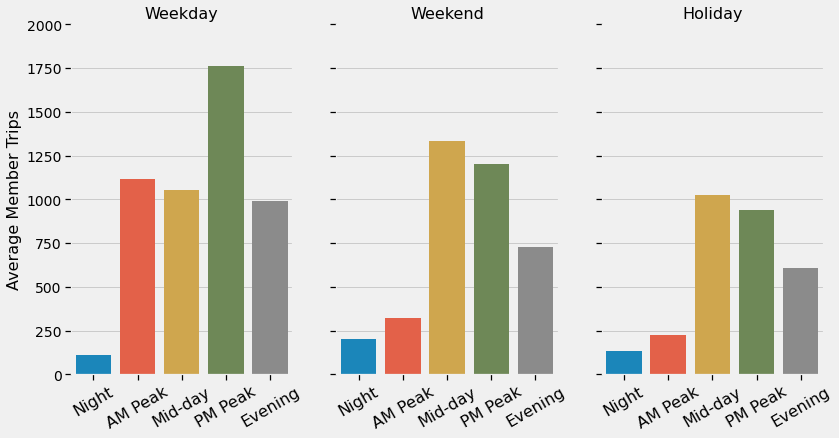

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

#axes = np.array(axes).flatten()
day_names = ['Weekday', 'Weekend']

for w, ax in zip(sorted(bike_weather['is_weekend'].unique()), axes):

    ride_by_weekday_in_period = (bike_weather[bike_weather['is_weekend'] == w]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Period', 
        y='Member Trips', 
        data=ride_by_weekday_in_period,
        ax=ax,
    )
    ax.set_title(day_names[(w)], fontsize = 16)
    ax.set_xlabel('') 
    ax.set_ylabel('')  
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'], fontsize = 16)

ride_by_holiday_in_period = (bike_weather[bike_weather['is_holiday'] == True]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
sns.barplot(
        x='Period', 
        y='Member Trips', 
        data=ride_by_holiday_in_period,
        ax=axes[2],
    )

axes[0].tick_params(axis='y', labelsize = 14)
axes[0].set_ylabel('Average Member Trips', fontsize=16)    


axes[2].set_title('Holiday', fontsize = 16)
axes[2].set_xlabel('') 
axes[2].set_ylabel('') 
axes[2].set_ylim(0, 2000) 
axes[2].tick_params(axis='x', rotation=30)
axes[2].set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'], fontsize = 16)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


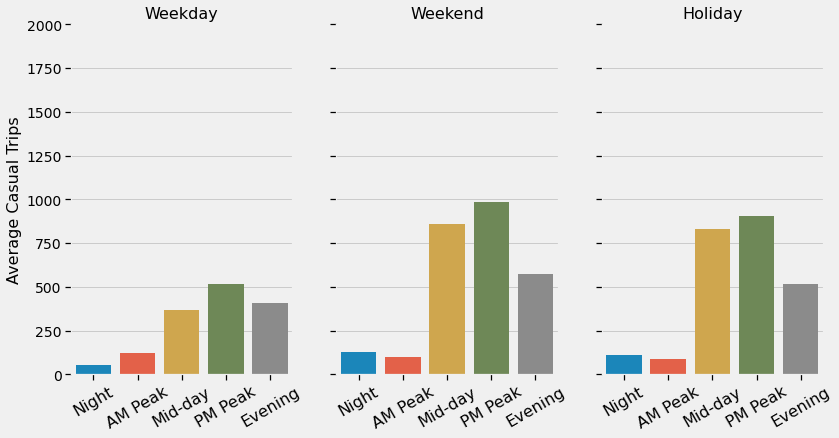

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

#axes = np.array(axes).flatten()
day_names = ['Weekday', 'Weekend']

for w, ax in zip(sorted(bike_weather['is_weekend'].unique()), axes):

    ride_by_weekday_in_period = (bike_weather[bike_weather['is_weekend'] == w]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Period', 
        y='Casual Trips', 
        data=ride_by_weekday_in_period,
        ax=ax,
    )
    ax.set_title(day_names[(w)], fontsize = 16)
    ax.set_xlabel('') 
    ax.set_ylabel('')  
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'], fontsize = 16)

ride_by_holiday_in_period = (bike_weather[bike_weather['is_holiday'] == True]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
sns.barplot(
        x='Period', 
        y='Casual Trips', 
        data=ride_by_holiday_in_period,
        ax=axes[2],
    )
axes[2].set_title('Holiday', fontsize = 16)
axes[2].set_xlabel('') 
axes[2].set_ylabel('')  
axes[2].set_ylim(0, 2000) 
axes[2].tick_params(axis='x', rotation=30)
axes[2].set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'], fontsize = 16)

axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Average Casual Trips', fontsize=16)    
fig.show()

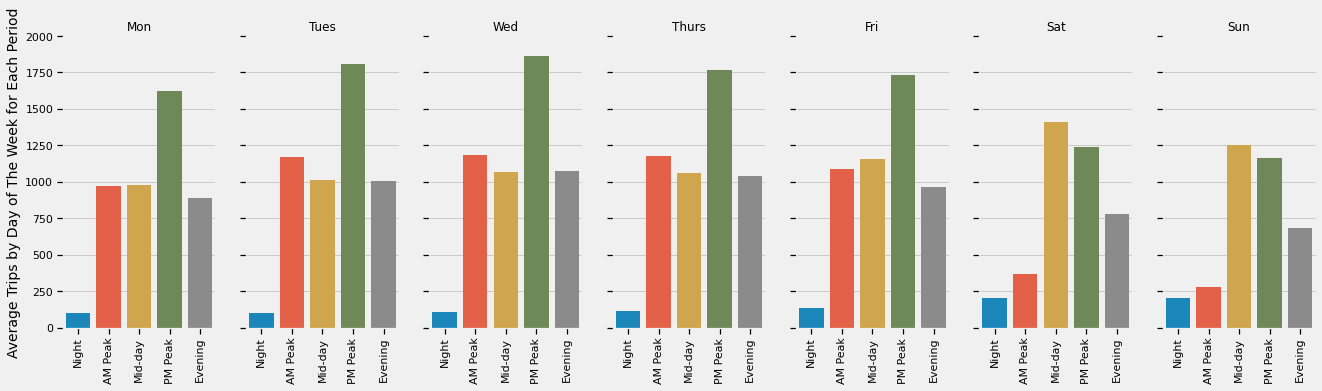

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5), sharex=True, sharey=True)

#axes = np.array(axes).flatten()
day_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

for w, ax in zip(sorted(bike_weather['Weekday'].unique()), axes):

    ride_by_weekday_in_period = (bike_weather[bike_weather['Weekday'] == w]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Period', 
        y='Member Trips', 
        data=ride_by_weekday_in_period,
        ax=ax,
    )

    ax.set_title(day_names[(w)])
    ax.set_xlabel('') 
    ax.set_ylabel('')  
    ax.set_ylim(0, 2000) 
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'])

axes[0].set_ylabel('Average Trips by Day of The Week for Each Period', fontsize=14)    
fig.show()

Text(0, 0.5, 'Average Trips by Day of The Week for Each Period')

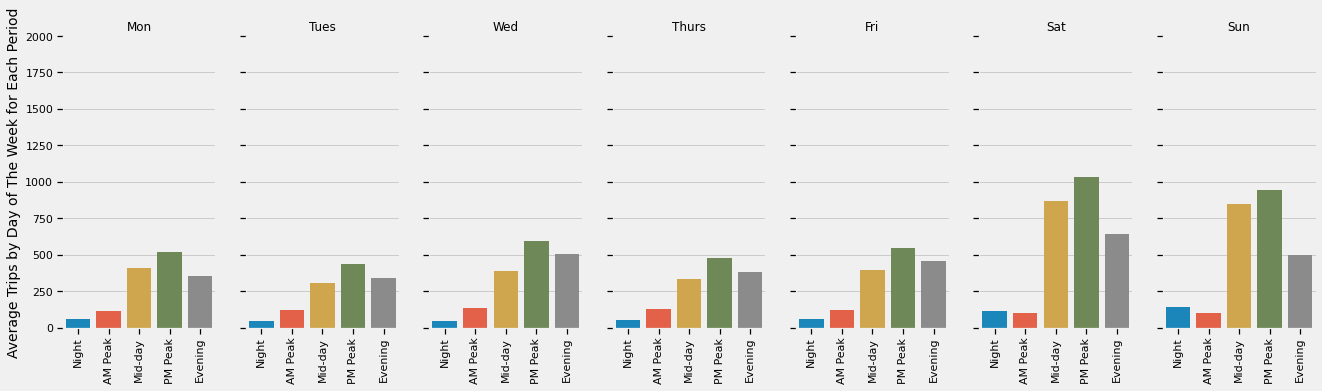

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5), sharex=True, sharey=True)

#axes = np.array(axes).flatten()
day_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

for w, ax in zip(sorted(bike_weather['Weekday'].unique()), axes):

    ride_by_weekday_in_period = (bike_weather[bike_weather['Weekday'] == w]
                             .groupby(['Period'])
                             .agg({'Total Trips': 'mean',
                                   'Member Trips': 'mean',
                                   'Casual Trips': 'mean',
                                   'Mean Trip Duration (sec)': 'mean'
                                    }
                                    ).reset_index())
    sns.barplot(
        x='Period', 
        y='Casual Trips', 
        data=ride_by_weekday_in_period,
        ax=ax,
    )
    ax.set_title(day_names[(w)])
    ax.set_xlabel('') 
    ax.set_ylabel('')  
    ax.set_ylim(0, 2000) 
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels(['Night', 'AM Peak', 'Mid-day', 'PM Peak', 'Evening'])

axes[0].set_ylabel('Average Trips by Day of The Week for Each Period', fontsize=14)    

# Weather Relationship

###In order to determine the most influential weather feature to bike share demand and trip duration, we need to investigate the relationship between all features in the dataset

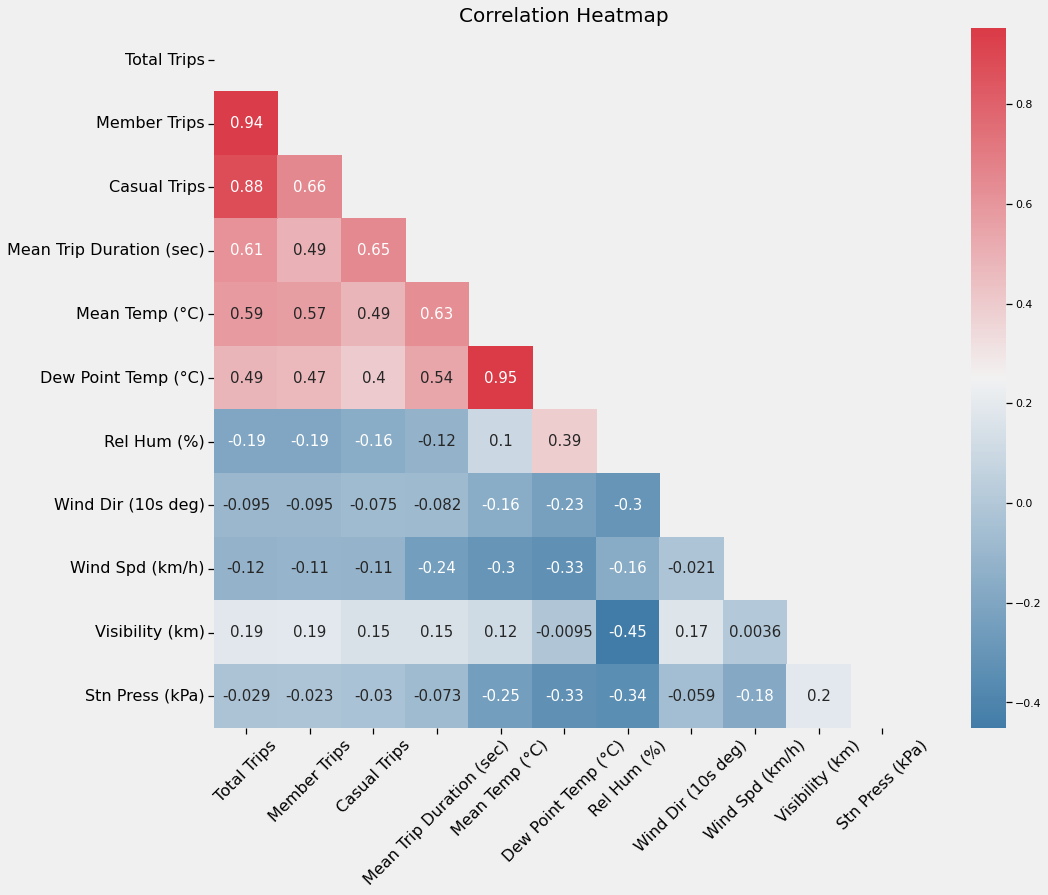

In [37]:
wea_var = ['Total Trips', 'Member Trips', 'Casual Trips', 'Mean Trip Duration (sec)', 'Mean Temp (°C)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)']

weather_reduced = bike_weather[wea_var]

correlation = weather_reduced.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,12))
plt.title('Correlation Heatmap', fontsize=20)
ax = sns.heatmap(correlation, mask=mask, square=True, annot=True, annot_kws={"size":15}, cmap=sns.diverging_palette(240, 10, as_cmap=True))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)      
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)     
plt.show()

### This correlation heatmap is a graphical representation of the correlation between different variables. It describes the relationship between continuous variables in our dataset (some weather variables and trip-related metrics)

### Total trips and mean trip duration is highly correlated to mean temperature and dew point teperature. Other weather features have very limited explainatory power to trip-related metrics.

### We can also use the pairplot to illustrate pairwise bivariate distribution between these variables:

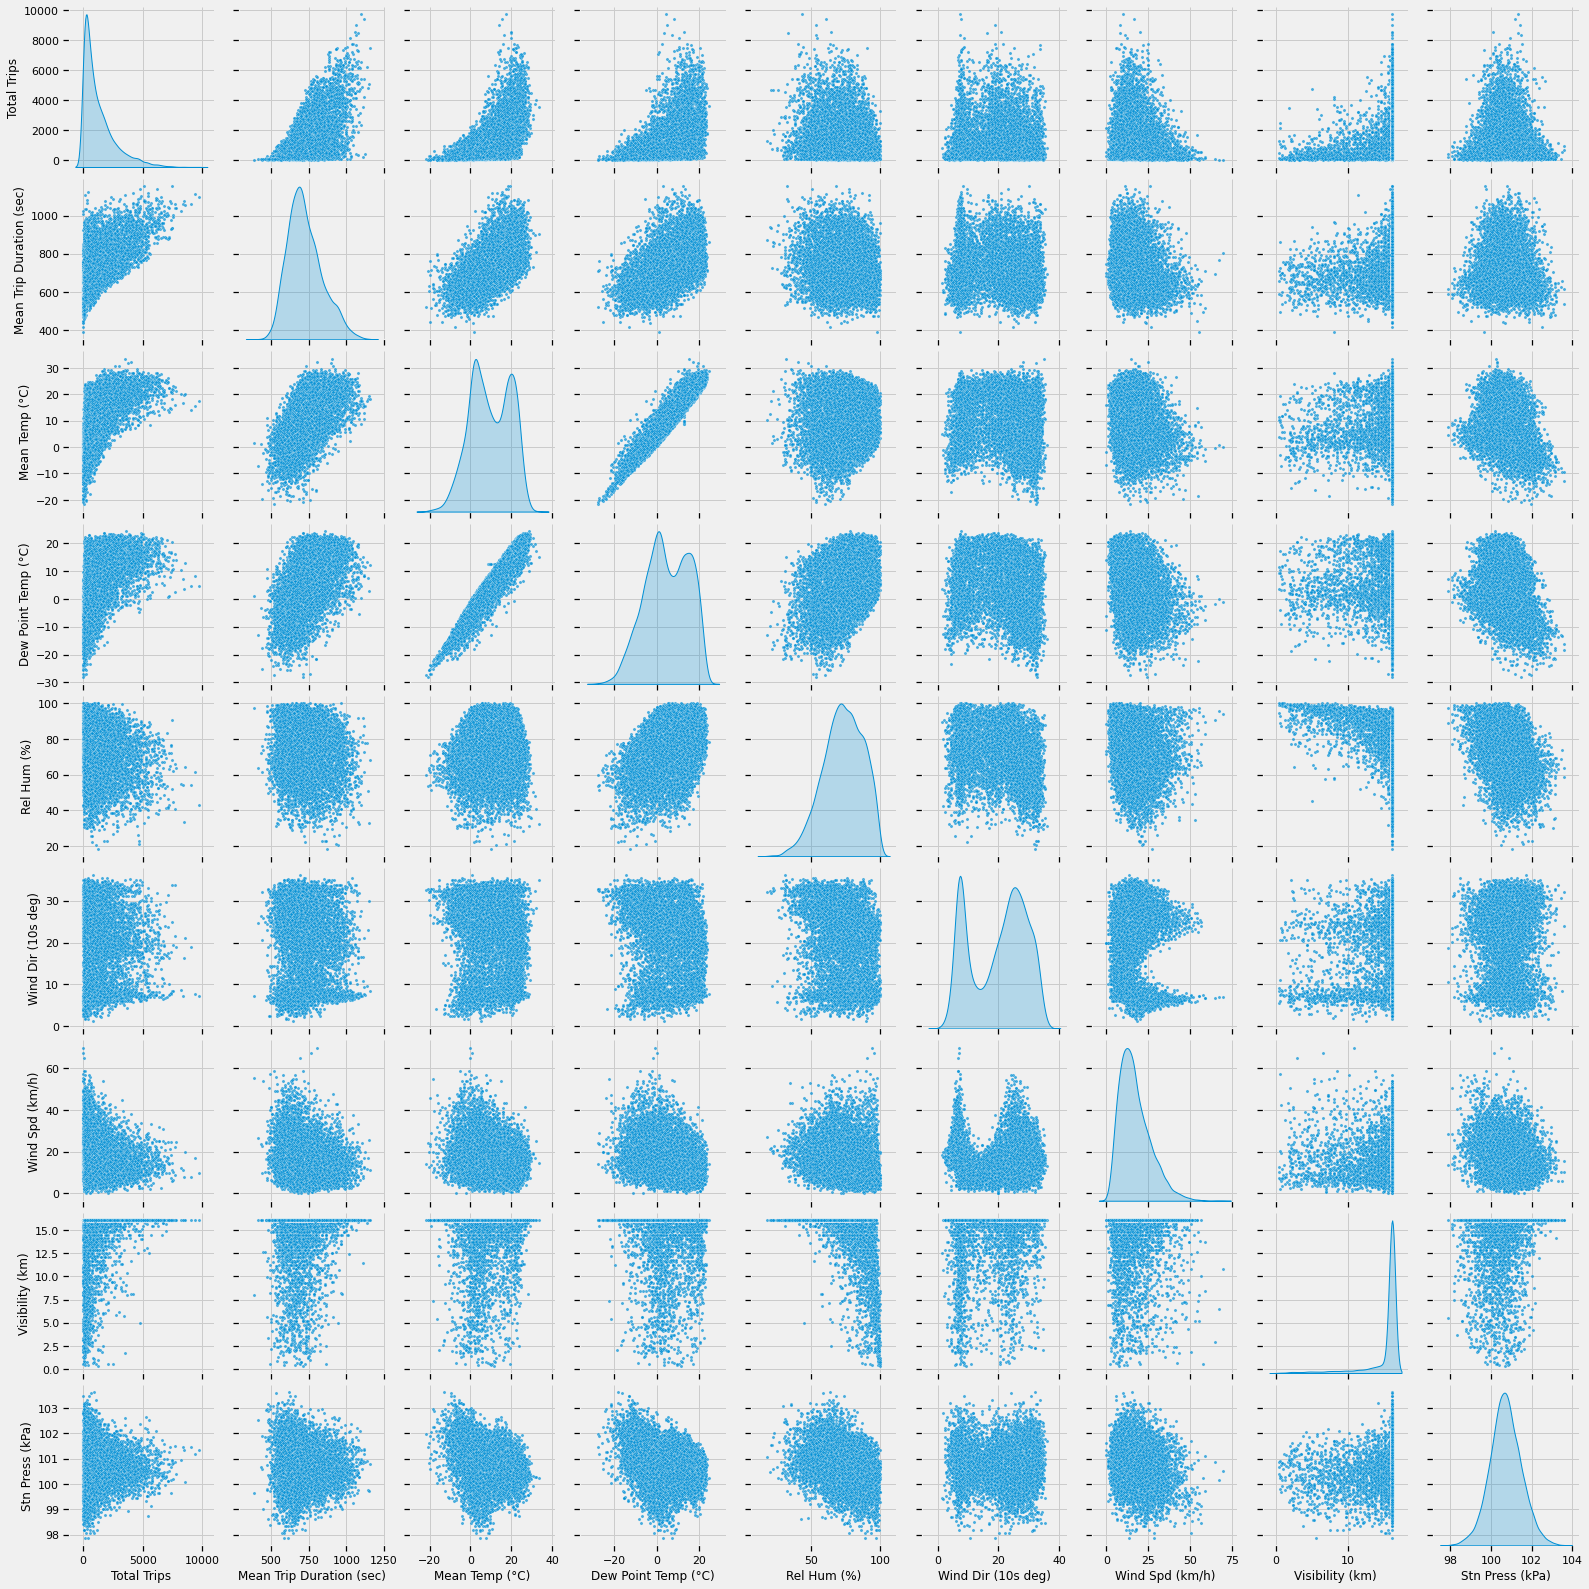

In [ ]:
#reduced_var = ['total trips', 'mean duration', 'Temp (°C)','Wind Spd (km/h)']
#weather_reduced_2 = bike_weather[reduced_var]

sns.pairplot(weather_reduced, diag_kind='kde', plot_kws={'s': 10, 'alpha' : .7})
plt.show()

### We can see that the temperature and dew point temperature are highly correlated. As such, we only need to use one of them to represent the temperature variable. Since the mean temperature have a higher correlation coefficient, it is selected as the variable representing the temperature.

### While the correlation heat map and pairplot demostrate the relationship between continuous variables; the weather condition is also represented by a categorical variable,weather condition, in the dataset:

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text major ticklabel objects>)

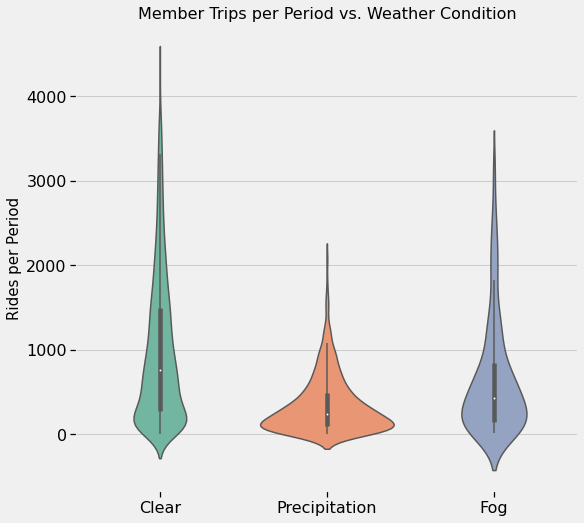

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.violinplot(data=bike_weather, x = 'Weather', y = 'Member Trips', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Trips per Period', fontsize = 15)
ax.set_title("Member Trips per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text major ticklabel objects>)

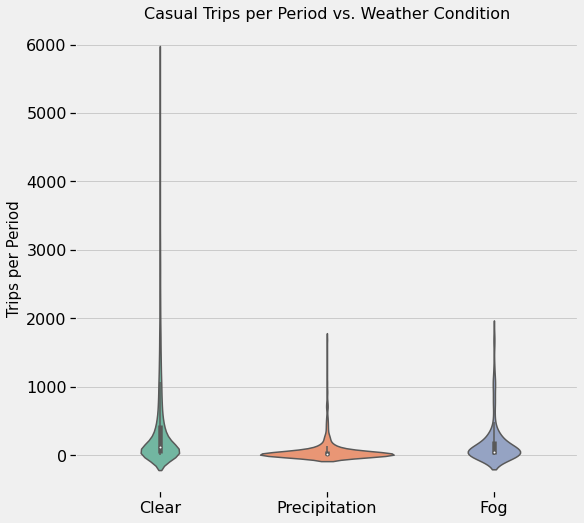

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.violinplot(data=bike_weather, x = 'Weather', y = 'Casual Trips', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Trips per Period', fontsize = 15)
ax.set_title("Casual Trips per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# side by side with above plot
plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=bike_weather, x = 'Weather', y = 'Casual Trips', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Rides per Period', fontsize = 15)
ax.set_title("Rides per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

NameError: ignored

(array([ 300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
        1200.]), <a list of 10 Text major ticklabel objects>)

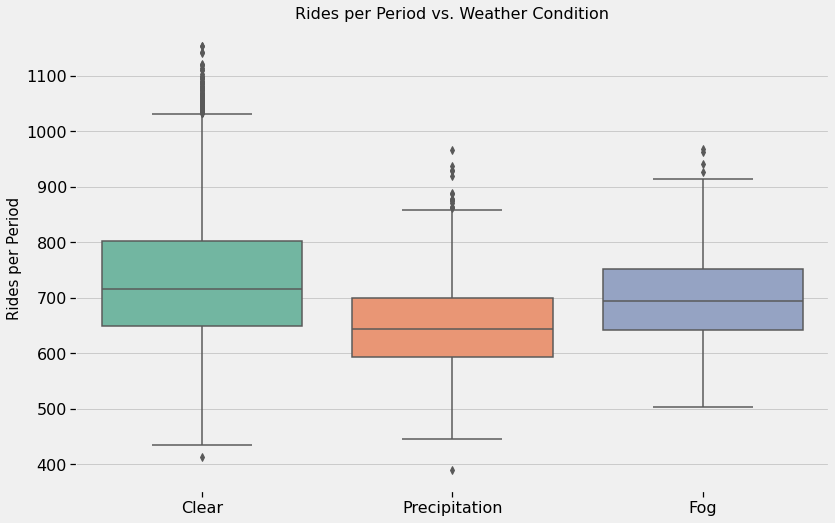

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=bike_weather, x = 'Weather', y = 'Mean Trip Duration (sec)', palette="Set2")#, inner = 'quartile')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Rides per Period', fontsize = 15)
ax.set_title("Rides per Period vs. Weather Condition", fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### It is clear that precipitation have an impact on whether a trip is initiated or not, but less of an effect on the duration of trips.

### Also important to note that the weather condition recorded for each trip is not as granular as other variables. Precipitation may not occur consistently temporally and spatially

### Let's explore the most significant bivariate relationship (rides vs temp) identified previously with detailed plot



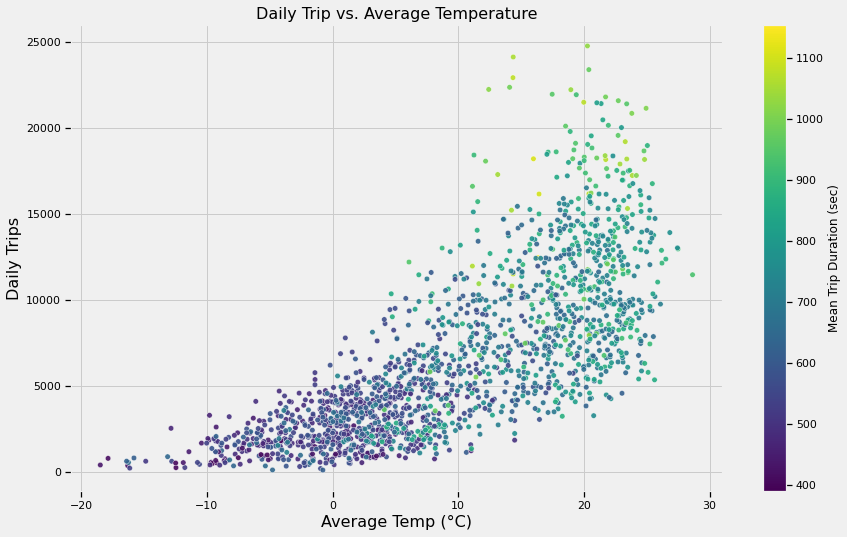

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather_day,
                     x = 'Mean Temp (°C)',
                     y = 'Total Trips', 
                     hue = 'Mean Trip Duration (sec)',
                     palette="viridis",
                     alpha=.9, s = 30, legend= False)

ax.set_xlabel('Average Temp (°C)', fontsize = 16)
ax.set_ylabel('Daily Trips', fontsize = 16)
ax.set_title("Daily Trip vs. Average Temperature", fontsize=16);

# Construct color map
norm = plt.Normalize(bike_weather[ 'Mean Trip Duration (sec)'].min(), 
                     bike_weather[ 'Mean Trip Duration (sec)'].max())
sm = plt.cm.ScalarMappable(cmap = 'viridis', norm=norm)
cbar = ax.figure.colorbar(sm)
cbar.set_label( 'Mean Trip Duration (sec)')

plt.show()

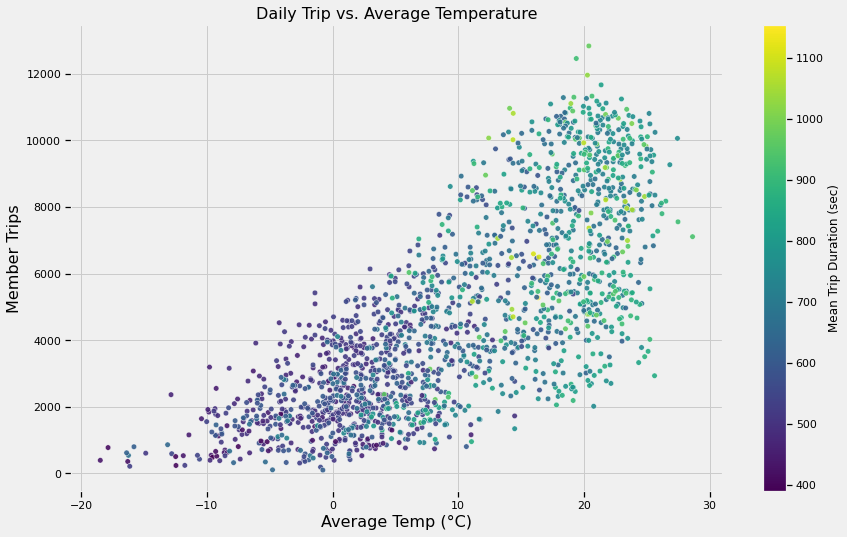

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather_day,
                     x = 'Mean Temp (°C)',
                     y = 'Member Trips', 
                     hue = 'Mean Trip Duration (sec)',
                     palette="viridis",
                     alpha=.9, s = 30, legend= False)

ax.set_xlabel('Average Temp (°C)', fontsize = 16)
ax.set_ylabel('Member Trips', fontsize = 16)
ax.set_title("Daily Trip vs. Average Temperature", fontsize=16);

# Construct color map
norm = plt.Normalize(bike_weather[ 'Mean Trip Duration (sec)'].min(), 
                     bike_weather[ 'Mean Trip Duration (sec)'].max())
sm = plt.cm.ScalarMappable(cmap = 'viridis', norm=norm)
cbar = ax.figure.colorbar(sm)
cbar.set_label( 'Mean Trip Duration (sec)')

plt.show()

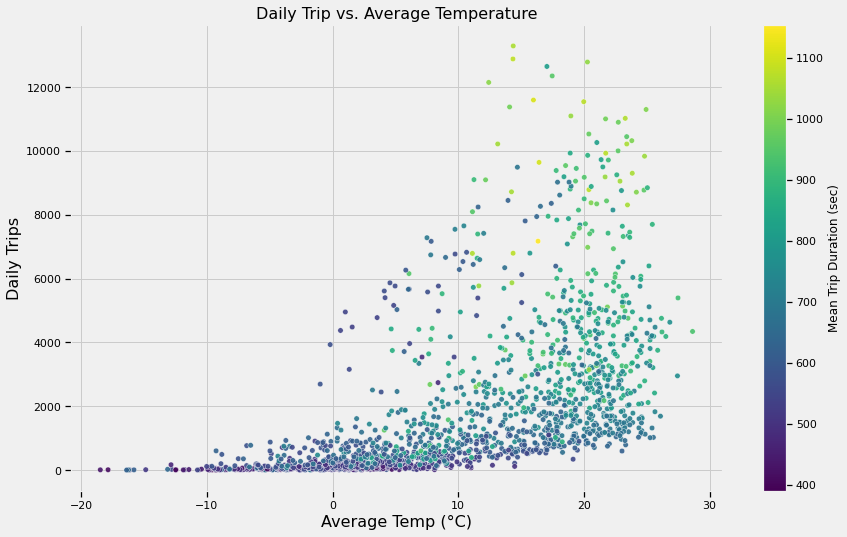

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather_day,
                     x = 'Mean Temp (°C)',
                     y = 'Casual Trips', 
                     hue = 'Mean Trip Duration (sec)',
                     palette="viridis",
                     alpha=.9, s = 30, legend= False)

ax.set_xlabel('Average Temp (°C)', fontsize = 16)
ax.set_ylabel('Daily Trips', fontsize = 16)
ax.set_title("Daily Trip vs. Average Temperature", fontsize=16);

# Construct color map
norm = plt.Normalize(bike_weather[ 'Mean Trip Duration (sec)'].min(), 
                     bike_weather[ 'Mean Trip Duration (sec)'].max())
sm = plt.cm.ScalarMappable(cmap = 'viridis', norm=norm)
cbar = ax.figure.colorbar(sm)
cbar.set_label( 'Mean Trip Duration (sec)')

plt.show()

Text(0, 0.5, 'Rides per Period')

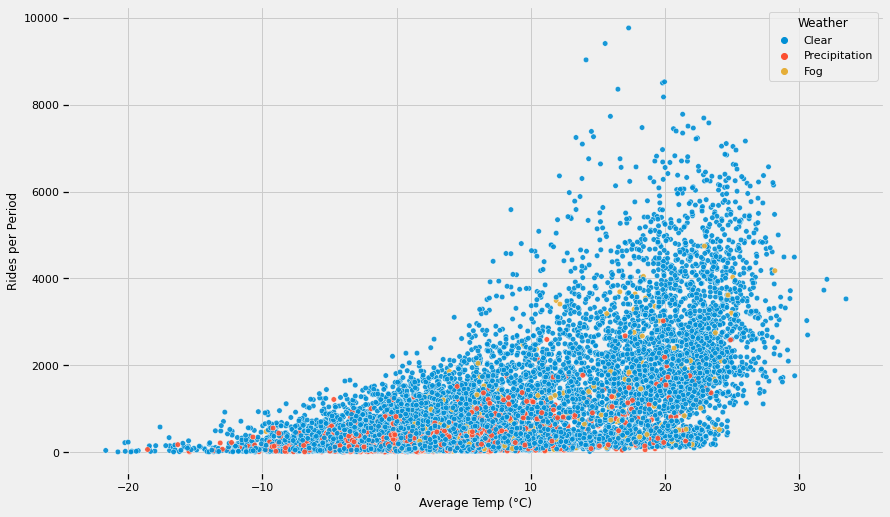

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather,
                     x = 'Mean Temp (°C)',
                     y = 'Total Trips', 
                     hue = 'Weather',
                     alpha=.9, s = 30)

ax.set_xlabel('Average Temp (°C)')
ax.set_ylabel('Rides per Period')

Text(0, 0.5, 'Rides per Period')

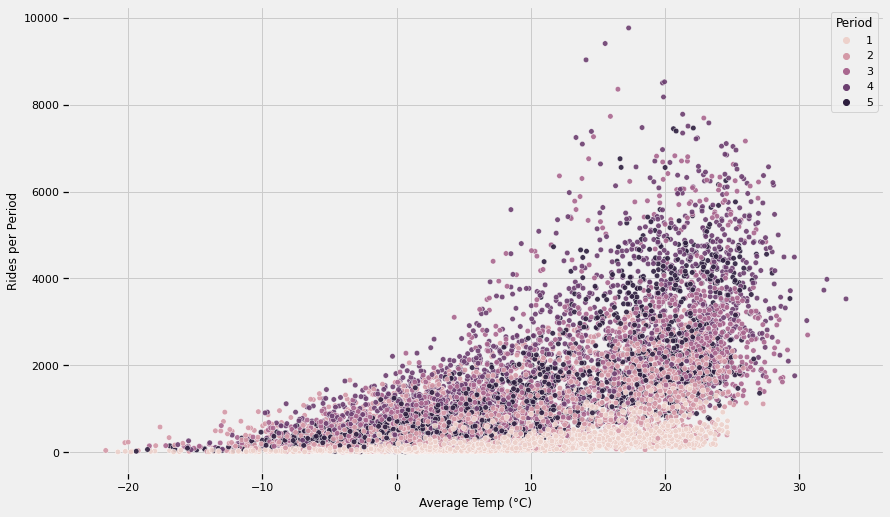

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather,
                     x = 'Mean Temp (°C)',
                     y = 'Total Trips', 
                     hue = 'Period',
                     alpha=.9, s = 30)

ax.set_xlabel('Average Temp (°C)')
ax.set_ylabel('Rides per Period')

Text(0, 0.5, 'Rides per Period')

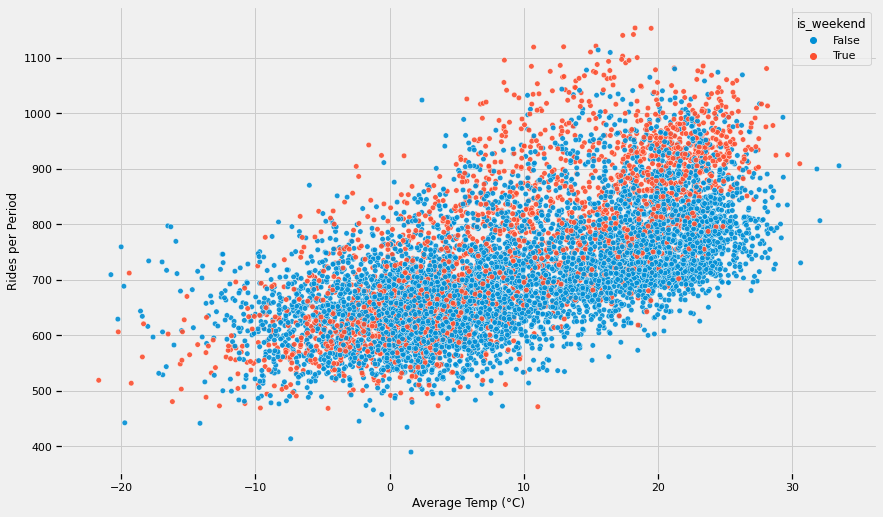

In [ ]:
# Scatter plot
plt.figure(figsize=(13, 8))

ax = sns.scatterplot(data=bike_weather,
                     x = 'Mean Temp (°C)',
                     y = 'Mean Trip Duration (sec)', 
                     hue = 'is_weekend',
                     alpha=.9, s = 30)

ax.set_xlabel('Average Temp (°C)')
ax.set_ylabel('Rides per Period')